In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 20_12_2022 07_33_12.xlsx'

In [3]:
#if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
 #   os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
#dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 12_12_2022 07_32_58.xlsx')

In [5]:
dados['Faixa Etaria'] = dados['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})

In [6]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [7]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [8]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [9]:
filtro = dados[['Faixa Etaria','Tem Comorbidade','Houve internacao','Classificacao final','Evolucao','pos_pcrflu','pcr_vsr']]
filtro

,Faixa Etaria,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
0,20-59 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
1,10-19 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
2,0-9 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
3,20-59 anos,Sim,Sim,SRAG não especificado,Óbito,NaN,NaN
4,0-9 anos,Não,Sim,SRAG não especificado,Cura,NaN,NaN
...,...,...,...,...,...,...,...
185526,60 anos ou mais,Sim,Sim,SRAG não especificado,Óbito,NaN,NaN
185527,60 anos ou mais,Sim,Sim,COVID-19,Segue Internado,Nao,1.0
185528,20-59 anos,Sim,Sim,SRAG não especificado,Ignorado,NaN,NaN
185529,60 anos ou mais,Sim,Sim,SRAG não especificado,Cura,NaN,NaN


# Inicio Comorbidade Influenza

In [10]:
total_InfluHosp = filtro.loc[filtro['Houve internacao']=='Sim']
total_InfluHosp = total_InfluHosp.loc[total_InfluHosp['pos_pcrflu']=='Sim']
total_InfluHosp = total_InfluHosp.groupby('Faixa Etaria').count()
total_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,107,107,107,107,107,8
10-19 anos,38,38,38,38,38,1
20-59 anos,215,215,215,215,215,3
60 anos ou mais,429,429,429,429,429,3


In [11]:
comorb_InfluHosp = filtro.loc[filtro['Houve internacao']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.loc[comorb_InfluHosp['pos_pcrflu']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.loc[comorb_InfluHosp['Tem Comorbidade']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.groupby('Faixa Etaria').count()
comorb_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,42,42,42,42,42,3
10-19 anos,24,24,24,24,24,1
20-59 anos,156,156,156,156,156,3
60 anos ou mais,386,386,386,386,386,3


In [12]:
comorb_InfluHosp['Proporcao'] = (comorb_InfluHosp['pos_pcrflu']/total_InfluHosp['pos_pcrflu'])*100
comorb_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,42,42,42,42,42,3,39.252336
10-19 anos,24,24,24,24,24,1,63.157895
20-59 anos,156,156,156,156,156,3,72.558140
60 anos ou mais,386,386,386,386,386,3,89.976690


# Inicio Comorbidade VSR

In [13]:
total_VSRHosp = filtro.loc[filtro['pcr_vsr']==1]
total_VSRHosp = total_VSRHosp.loc[total_VSRHosp['Houve internacao']=='Sim']
total_VSRHosp = total_VSRHosp.groupby('Faixa Etaria').count()
total_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,1829,1829,1829,1829,1129,1829
10-19 anos,13,13,13,13,6,13
20-59 anos,116,116,116,116,66,116
60 anos ou mais,243,243,243,243,124,243


In [14]:
comorb_VSRHosp = filtro.loc[filtro['pcr_vsr']==1]
comorb_VSRHosp = comorb_VSRHosp.loc[comorb_VSRHosp['Houve internacao']=='Sim']
comorb_VSRHosp = comorb_VSRHosp.loc[comorb_VSRHosp['Tem Comorbidade']=='Sim']
comorb_VSRHosp = comorb_VSRHosp.groupby('Faixa Etaria').count()
comorb_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,340,340,340,340,209,340
10-19 anos,11,11,11,11,4,11
20-59 anos,94,94,94,94,53,94
60 anos ou mais,228,228,228,228,118,228


In [15]:
comorb_VSRHosp['Proporcao'] = (comorb_VSRHosp['pcr_vsr']/total_VSRHosp['pcr_vsr'])*100
comorb_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,340,340,340,340,209,340,18.589393
10-19 anos,11,11,11,11,4,11,84.615385
20-59 anos,94,94,94,94,53,94,81.034483
60 anos ou mais,228,228,228,228,118,228,93.827160


# Inicio comorbidade COVID

In [27]:
total_CovidHosp = filtro.loc[filtro['Classificacao final']=='COVID-19']
total_CovidHosp = total_CovidHosp.loc[total_CovidHosp['Houve internacao']=='Sim']
total_CovidHosp = total_CovidHosp.groupby('Faixa Etaria').count()
total_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,1500,1500,1500,1500,573,77
10-19 anos,762,762,762,762,208,3
20-59 anos,59749,59749,59749,59749,16881,15
60 anos ou mais,67126,67126,67126,67126,21121,31


In [28]:
comorb_CovidHosp = filtro.loc[filtro['Classificacao final']=='COVID-19']
comorb_CovidHosp = comorb_CovidHosp.loc[comorb_CovidHosp['Houve internacao']=='Sim']
comorb_CovidHosp = comorb_CovidHosp.loc[comorb_CovidHosp['Tem Comorbidade']=='Sim']
comorb_CovidHosp = comorb_CovidHosp.groupby('Faixa Etaria').count()
comorb_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,536,536,536,536,228,14
10-19 anos,406,406,406,406,120,2
20-59 anos,34049,34049,34049,34049,10162,11
60 anos ou mais,56643,56643,56643,56643,18327,29


In [29]:
comorb_CovidHosp['Proporcao'] = (comorb_CovidHosp['Classificacao final']/total_CovidHosp['Classificacao final'])*100
comorb_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,536,536,536,536,228,14,35.733333
10-19 anos,406,406,406,406,120,2,53.280840
20-59 anos,34049,34049,34049,34049,10162,11,56.986728
60 anos ou mais,56643,56643,56643,56643,18327,29,84.383100


In [16]:
teste = [335,39,11,20,93,142,224,347]

In [30]:
faixaEtaria = comorb_VSRHosp.reset_index()
faixaEtaria = faixaEtaria['Faixa Etaria']
legenda = ['Influenza','VSR','COVID-19']

In [18]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 13_12_2022'

[Text(0, 0, '0%'),
 Text(0, 10, '10%'),
 Text(0, 20, '20%'),
 Text(0, 30, '30%'),
 Text(0, 40, '40%'),
 Text(0, 50, '50%'),
 Text(0, 60, '60%'),
 Text(0, 70, '70%'),
 Text(0, 80, '80%'),
 Text(0, 90, '90%'),
 Text(0, 100, '100%')]

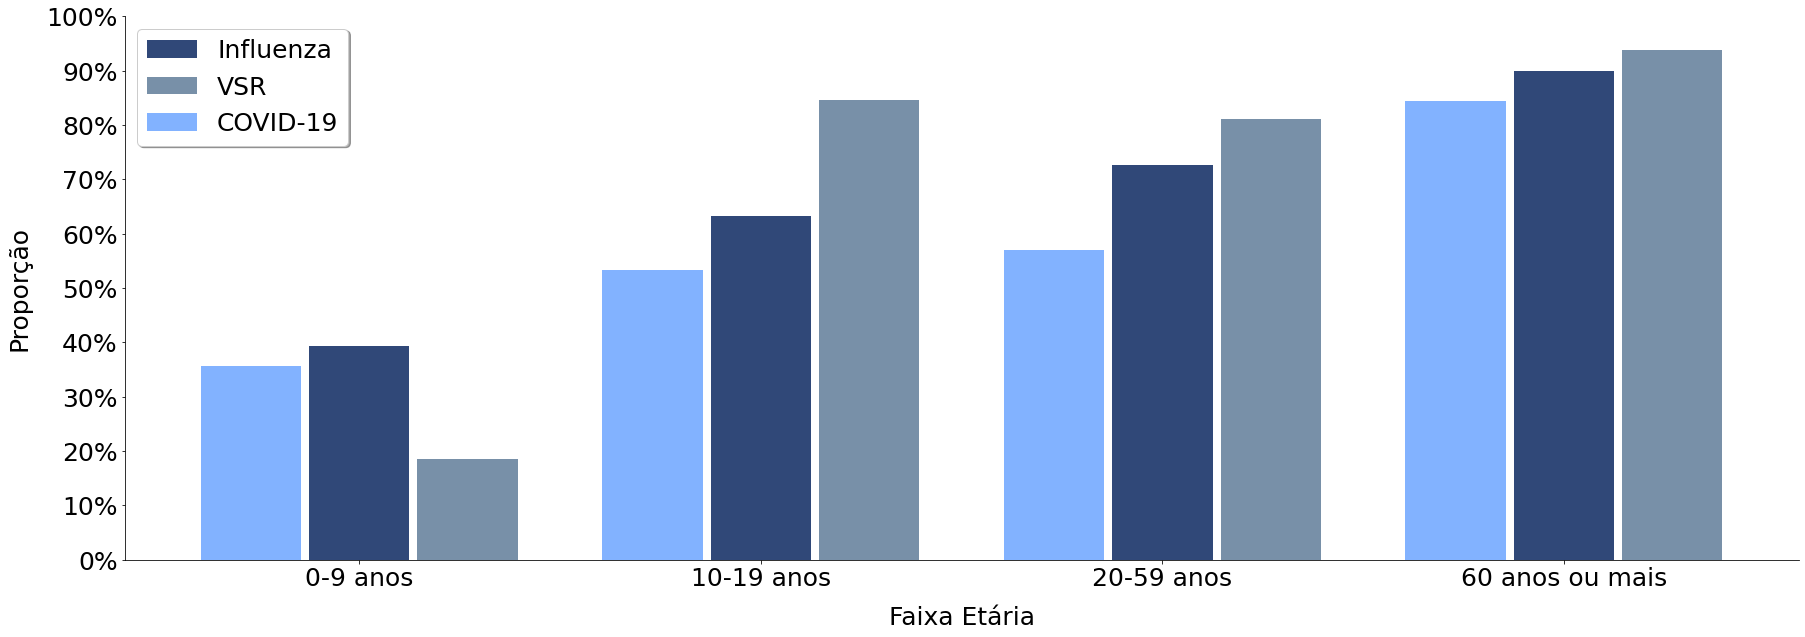

In [40]:
plt.figure(figsize=(30,10))
width = 0.25
plt.bar(faixaEtaria,comorb_InfluHosp['Proporcao'],width,color='#304878')
plt.bar(np.arange(0,4,1)+0.270,comorb_VSRHosp['Proporcao'],width,color='#7890a8')
plt.bar(np.arange(0,4,1)-0.270,comorb_CovidHosp['Proporcao'],width,color='#82b2ff')
plt.xlabel('Faixa Etária',fontsize=25,labelpad=15)
plt.ylabel('Proporção',fontsize=25,labelpad=15)
plt.xticks(np.arange(0,4,1),['0-9 anos','10-19 anos','20-59 anos','60 anos ou mais'],fontsize=25)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.legend(legenda,fontsize=25,shadow=True)
sns.despine()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Comorbidade_Influ_VSR_Hosp.png',dpi=720,bbox_inches='tight')

# Inicio Influenza Obito

In [20]:
total_InfluObito = filtro.loc[filtro['pos_pcrflu']=='Sim']
total_InfluObito = total_InfluObito.loc[total_InfluObito['Evolucao']=='Óbito']
total_InfluObito = total_InfluObito.groupby('Faixa Etaria').count()
total_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,2,2,2,2,2,0
10-19 anos,1,1,1,1,1,0
20-59 anos,24,24,24,24,24,0
60 anos ou mais,97,97,97,97,97,1


In [21]:
comorb_InfluObito = filtro.loc[filtro['pos_pcrflu']=='Sim']
comorb_InfluObito = comorb_InfluObito.loc[comorb_InfluObito['Evolucao']=='Óbito']
comorb_InfluObito = comorb_InfluObito.loc[comorb_InfluObito['Tem Comorbidade']=='Sim']
comorb_InfluObito = comorb_InfluObito.groupby('Faixa Etaria').count()
comorb_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,2,2,2,2,2,0
10-19 anos,1,1,1,1,1,0
20-59 anos,18,18,18,18,18,0
60 anos ou mais,89,89,89,89,89,1


In [22]:
comorb_InfluObito['Proporcao'] = (comorb_InfluObito['pos_pcrflu']/total_InfluObito['pos_pcrflu'])*100
comorb_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,2,2,2,2,2,0,100.000000
10-19 anos,1,1,1,1,1,0,100.000000
20-59 anos,18,18,18,18,18,0,75.000000
60 anos ou mais,89,89,89,89,89,1,91.752577


# Inicio VSR Obito

In [23]:
total_VSRObito = filtro.loc[filtro['pcr_vsr']==1]
total_VSRObito = total_VSRObito.loc[total_VSRObito['Evolucao']=='Óbito']
total_VSRObito = total_VSRObito.groupby('Faixa Etaria').count()
total_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,13,13,13,13,10,13
10-19 anos,1,1,1,1,0,1
20-59 anos,17,17,17,17,10,17
60 anos ou mais,64,64,64,64,32,64


In [24]:
comorb_VSRObito = filtro.loc[filtro['pcr_vsr']==1]
comorb_VSRObito = comorb_VSRObito.loc[comorb_VSRObito['Evolucao']=='Óbito']
comorb_VSRObito = comorb_VSRObito.loc[comorb_VSRObito['Tem Comorbidade']=='Sim']
comorb_VSRObito = comorb_VSRObito.groupby('Faixa Etaria').count()
comorb_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,3,3,3,3,2,3
10-19 anos,1,1,1,1,0,1
20-59 anos,16,16,16,16,10,16
60 anos ou mais,61,61,61,61,30,61


In [25]:
comorb_VSRObito['Proporcao'] = (comorb_VSRObito['pcr_vsr']/total_VSRObito['pcr_vsr'])*100
comorb_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,3,3,3,3,2,3,23.076923
10-19 anos,1,1,1,1,0,1,100.000000
20-59 anos,16,16,16,16,10,16,94.117647
60 anos ou mais,61,61,61,61,30,61,95.312500


# Inicio Obito COVID

In [41]:
total_CovidObito = filtro.loc[filtro['Classificacao final']=='COVID-19']
total_CovidObito = total_CovidObito.loc[total_CovidObito['Evolucao']=='Óbito']
total_CovidObito = total_CovidObito.groupby('Faixa Etaria').count()
total_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,45,45,45,45,16,1
10-19 anos,69,69,69,69,22,0
20-59 anos,11069,11069,11069,11069,3595,4
60 anos ou mais,30139,30139,30139,30139,9954,14


In [42]:
comorb_CovidObito = filtro.loc[filtro['Classificacao final']=='COVID-19']
comorb_CovidObito = comorb_CovidObito.loc[comorb_CovidObito['Evolucao']=='Óbito']
comorb_CovidObito = comorb_CovidObito.loc[comorb_CovidObito['Tem Comorbidade']=='Sim']
comorb_CovidObito = comorb_CovidObito.groupby('Faixa Etaria').count()
comorb_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,36,36,36,36,14,1
10-19 anos,63,63,63,63,21,0
20-59 anos,8835,8835,8835,8835,2902,4
60 anos ou mais,27279,27279,27279,27279,9122,14


In [43]:
comorb_CovidObito['Proporcao'] = (comorb_CovidObito['Classificacao final']/total_CovidObito['Classificacao final'])*100
comorb_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,36,36,36,36,14,1,80.000000
10-19 anos,63,63,63,63,21,0,91.304348
20-59 anos,8835,8835,8835,8835,2902,4,79.817508
60 anos ou mais,27279,27279,27279,27279,9122,14,90.510634


[Text(0, 0, '0%'),
 Text(0, 10, '10%'),
 Text(0, 20, '20%'),
 Text(0, 30, '30%'),
 Text(0, 40, '40%'),
 Text(0, 50, '50%'),
 Text(0, 60, '60%'),
 Text(0, 70, '70%'),
 Text(0, 80, '80%'),
 Text(0, 90, '90%'),
 Text(0, 100, '100%')]

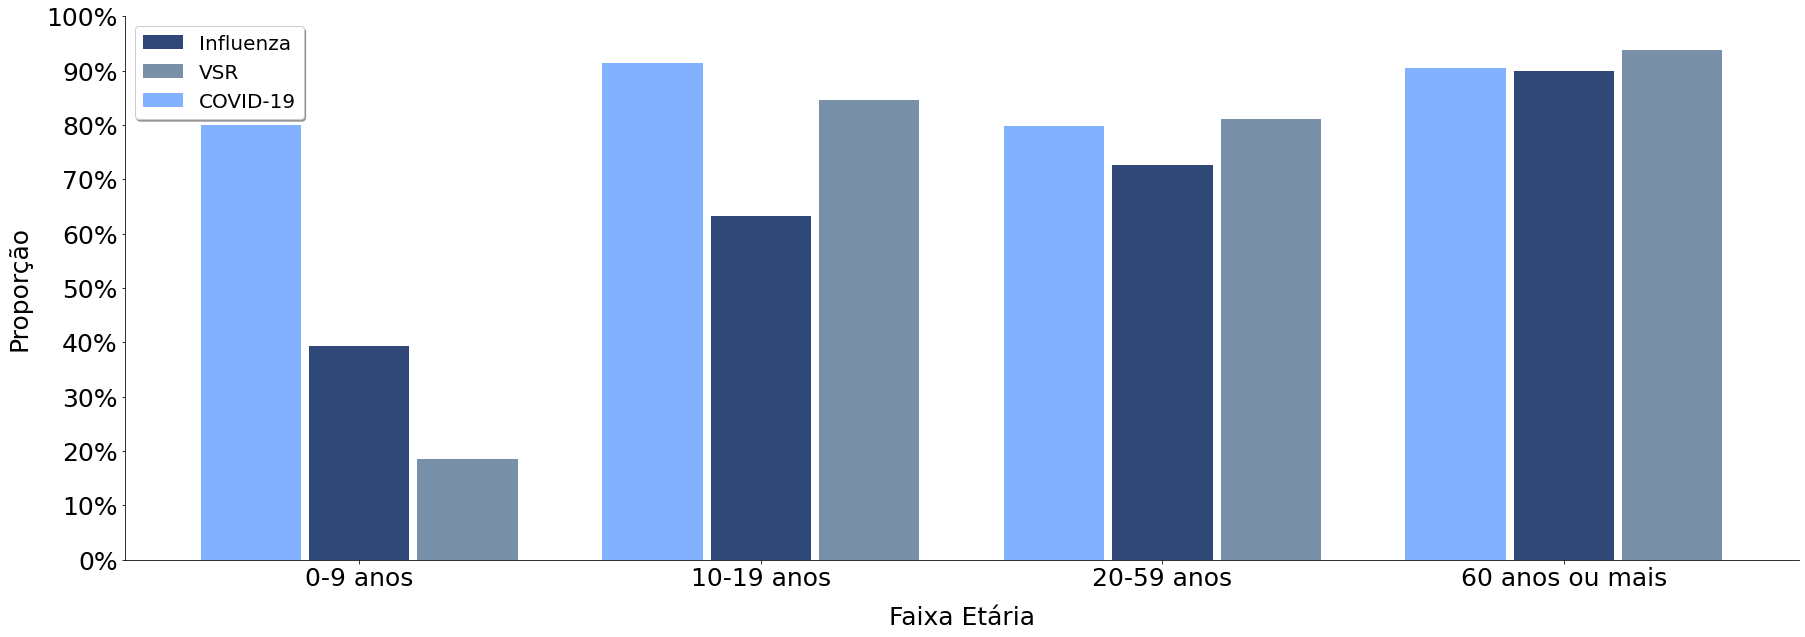

In [45]:
plt.figure(figsize=(30,10))
width = 0.25
plt.bar(faixaEtaria,comorb_InfluHosp['Proporcao'],width,color='#304878')
plt.bar(np.arange(0,4,1)+0.270,comorb_VSRHosp['Proporcao'],width,color='#7890a8')
plt.bar(np.arange(0,4,1)-0.270,comorb_CovidObito['Proporcao'],width,color='#82b2ff')
plt.xlabel('Faixa Etária',fontsize=25,labelpad=15)
plt.ylabel('Proporção',fontsize=25,labelpad=15)
plt.xticks(np.arange(0,4,1),['0-9 anos','10-19 anos','20-59 anos','60 anos ou mais'],fontsize=25)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.legend(legenda,fontsize=20,shadow=True)
sns.despine()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Comorbidade_Influ_VSR_Obito.png',dpi=720,bbox_inches='tight')